## Deadline

Wednesday, November 22, 2017, 11:59PM

## Important notes

- When you push your Notebook to GitHub, all the cells must already have been evaluated.
- Don't forget to add a textual description of your thought process and of any assumptions you've made.
- Please write all your comments in English, and use meaningful variable names in your code.

## Question 1: Propensity score matching

In this exercise, you will apply [propensity score matching](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf), which we discussed in lecture 5 ("Observational studies"), in order to draw conclusions from an observational study.

We will work with a by-now classic dataset from Robert LaLonde's study "[Evaluating the Econometric Evaluations of Training Programs](http://people.hbs.edu/nashraf/LaLonde_1986.pdf)" (1986).
The study investigated the effect of a job training program ("National Supported Work Demonstration") on the real earnings of an individual, a couple of years after completion of the program.
Your task is to determine the effectiveness of the "treatment" represented by the job training program.

#### Dataset description

- `treat`: 1 if the subject participated in the job training program, 0 otherwise
- `age`: the subject's age
- `educ`: years of education
- `race`: categorical variable with three possible values: Black, Hispanic, or White
- `married`: 1 if the subject was married at the time of the training program, 0 otherwise
- `nodegree`: 1 if the subject has earned no school degree, 0 otherwise
- `re74`: real earnings in 1974 (pre-treatment)
- `re75`: real earnings in 1975 (pre-treatment)
- `re78`: real earnings in 1978 (outcome)

If you want to brush up your knowledge on propensity scores and observational studies, we highly recommend Rosenbaum's excellent book on the ["Design of Observational Studies"](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf). Even just reading the first chapter (18 pages) will help you a lot.

#### 1. A naive analysis

Compare the distribution of the outcome variable (`re78`) between the two groups, using plots and numbers.
To summarize and compare the distributions, you may use the techniques we discussed in lectures 4 ("Read the stats carefully") and 6 ("Data visualization").

What might a naive "researcher" conclude from this superficial analysis?

#### 2. A closer look at the data

You're not naive, of course (and even if you are, you've learned certain things in ADA), so you aren't content with a superficial analysis such as the above.
You're aware of the dangers of observational studies, so you take a closer look at the data before jumping to conclusions.

For each feature in the dataset, compare its distribution in the treated group with its distribution in the control group, using plots and numbers.
As above, you may use the techniques we discussed in class for summarizing and comparing the distributions.

What do you observe?
Describe what your observations mean for the conclusions drawn by the naive "researcher" from his superficial analysis.

#### 3. A propsensity score model

Use logistic regression to estimate propensity scores for all points in the dataset.
You may use `sklearn` to fit the logistic regression model and apply it to each data point to obtain propensity scores:

```python
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
```

Recall that the propensity score of a data point represents its probability of receiving the treatment, based on its pre-treatment features (in this case, age, education, pre-treatment income, etc.).
To brush up on propensity scores, you may read chapter 3.3 of the above-cited book by Rosenbaum or [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).

Note: you do not need a train/test split here. Train and apply the model on the entire dataset. If you're wondering why this is the right thing to do in this situation, recall that the propensity score model is not used in order to make predictions about unseen data. Its sole purpose is to balance the dataset across treatment groups.
(See p. 74 of Rosenbaum's book for an explanation why slight overfitting is even good for propensity scores.
If you want even more information, read [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).)

#### 4. Balancing the dataset via matching

Use the propensity scores to match each data point from the treated group with exactly one data point from the control group, while ensuring that each data point from the control group is matched with at most one data point from the treated group.
(Hint: you may explore the `networkx` package in Python for predefined matching functions.)

Your matching should maximize the similarity between matched subjects, as captured by their propensity scores.
In other words, the sum (over all matched pairs) of absolute propensity-score differences between the two matched subjects should be minimized.

After matching, you have as many treated as you have control subjects.
Compare the outcomes (`re78`) between the two groups (treated and control).

Also, compare again the feature-value distributions between the two groups, as you've done in part 2 above, but now only for the matched subjects.
What do you observe?
Are you closer to being able to draw valid conclusions now than you were before?


#### 5. Balancing the groups further

Based on your comparison of feature-value distributions from part 4, are you fully satisfied with your matching?
Would you say your dataset is sufficiently balanced?
If not, in what ways could the "balanced" dataset you have obtained still not allow you to draw valid conclusions?

Improve your matching by explicitly making sure that you match only subjects that have the same value for the problematic feature.
Argue with numbers and plots that the two groups (treated and control) are now better balanced than after part 4.


#### 6. A less naive analysis

Compare the outcomes (`re78`) between treated and control subjects, as you've done in part 1, but now only for the matched dataset you've obtained from part 5.
What do you conclude about the effectiveness of the job training program?


___

## Question 2: Applied ML

We are going to build a classifier of news to directly assign them to 20 news categories. Note that the pipeline that you will build in this exercise could be of great help during your project if you plan to work with text!

1. Load the 20newsgroup dataset. It is, again, a classic dataset that can directly be loaded using sklearn ([link](http://scikit-learn.org/stable/datasets/twenty_newsgroups.html)).  
[TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf), short for term frequency–inverse document frequency, is of great help when if comes to compute textual features. Indeed, it gives more importance to terms that are more specific to the considered articles (TF) but reduces the importance of terms that are very frequent in the entire corpus (IDF). Compute TF-IDF features for every article using [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Then, split your dataset into a training, a testing and a validation set (10% for validation and 10% for testing). Each observation should be paired with its corresponding label (the article category).


2. Train a random forest on your training set. Try to fine-tune the parameters of your predictor on your validation set using a simple grid search on the number of estimator "n_estimators" and the max depth of the trees "max_depth". Then, display a confusion matrix of your classification pipeline. Lastly, once you assessed your model, inspect the `feature_importances_` attribute of your random forest and discuss the obtained results.




In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import seaborn as sns
%matplotlib inline

In [243]:
dataset = pd.read_csv('lalonde.csv')
print(dataset.shape)
dataset[0:30]

(614, 11)


,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899
5,NSW6,1,22,9,1,0,0,1,0.0,0.0,4056.4940
6,NSW7,1,23,12,1,0,0,0,0.0,0.0,0.0000
7,NSW8,1,32,11,1,0,0,1,0.0,0.0,8472.1580
8,NSW9,1,22,16,1,0,0,0,0.0,0.0,2164.0220
9,NSW10,1,33,12,0,0,1,0,0.0,0.0,12418.0700


In [244]:
treated    = dataset[dataset['treat'] == 0]
untreated  = dataset[dataset['treat'] == 1]
print(len(treated['re78']), 'participated in the job training program vs ', len(untreated['re78']), ' who did not')


429 participated in the job training program vs  185  who did not


 
Untreated Group


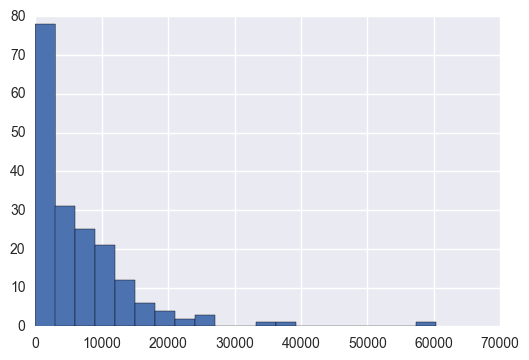


Treated Group 


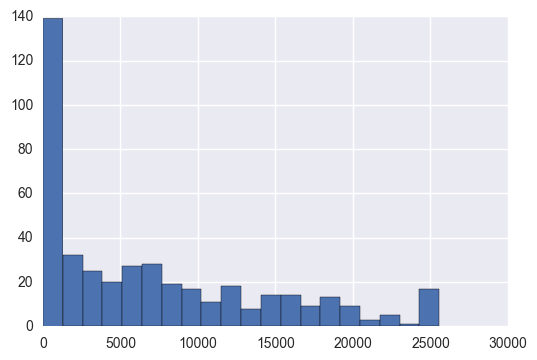

Treated Group 
 count      429.000000
mean      6984.169742
std       7294.161791
min          0.000000
25%        220.181300
50%       4975.505000
75%      11688.820000
max      25564.670000
Name: re78, dtype: float64
Untreated Group 
 count      185.000000
mean      6349.143530
std       7867.402218
min          0.000000
25%        485.229800
50%       4232.309000
75%       9642.999000
max      60307.930000
Name: re78, dtype: float64
Result of Kolmogorov-Smirnov between treated and untreated group :  Ks_2sampResult(statistic=0.098607698607698691, pvalue=0.15279452288468109)


In [247]:
print(' \nUntreated Group')

plt.hist(untreated['re78'],20)
plt.show()

print('\nTreated Group ')

plt.hist(treated['re78'], 20)
plt.show()

print('Treated Group \n', treated['re78'].describe())

print('Untreated Group \n',untreated['re78'].describe())

print('Result of Kolmogorov-Smirnov between treated and untreated group : ', stats.ks_2samp(treated['re78'],untreated['re78']))

First thing we observe is that the distribution is skewed: 429 treated vs only 185 non treated <br>
Secondly we observe that both distrubutions are heavy-tailed.<br>
Then, we suspect from dataset that there might be hidden factors and therefore one might avoid making conclusions only from such a plot(above) directly correlating  'treat' with 're78'
The inexperience ressearched may conclude from the graphics that the job training program is not very effective as:
    1. More than half of treated group has an outcome inferior to 5k
    2. The untreted group has roughly the same rate

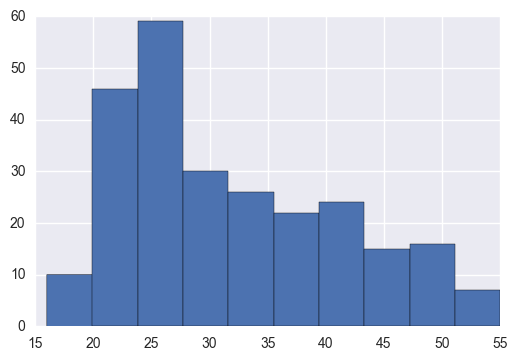

(array([ 143.,   78.,   54.,   32.,    9.,   13.,   10.,    8.,    4.,    8.]),
 array([ 16. ,  19.9,  23.8,  27.7,  31.6,  35.5,  39.4,  43.3,  47.2,
         51.1,  55. ]),
 <a list of 10 Patch objects>)

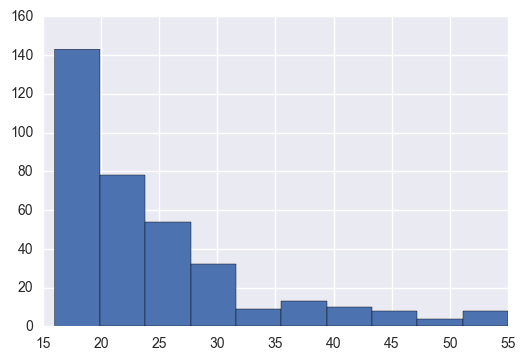

In [248]:
married = dataset[dataset['married'] == 1]
unmarried = dataset[dataset['married'] == 0]

plt.hist(married['age'],10)
plt.show()
plt.hist(unmarried['age'],10)



In [249]:
untreated[untreated['re78']<5000]['id'].count()/len(untreated)

0.54594594594594592

In [250]:
np.random.seed(1)
y= np.random.normal(0,1,1000)

#stats.kstest(np.array(treated['re78']), 'powerlaw',args=(1.6,0))
stats.kstest(np.array(treated['re78']), 'norm')
stats.kstest(np.array(treated['re78']), 'lognorm',args=(1.5,2.5))


KstestResult(statistic=0.76328414512882414, pvalue=0.0)

 
Untreated Group for  age


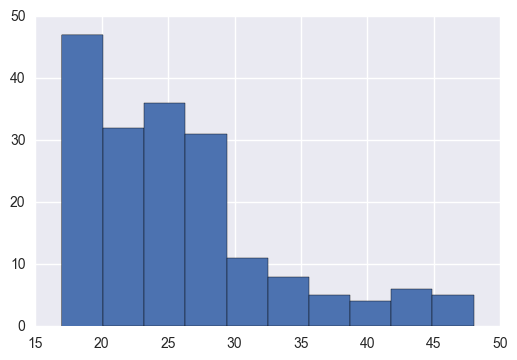


Treated Group for  age


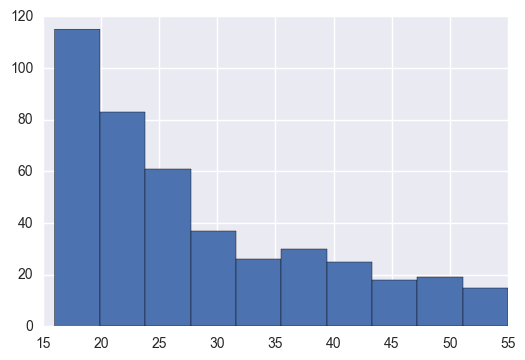

Treated Group 
 count    429.000000
mean      28.030303
std       10.786653
min       16.000000
25%       19.000000
50%       25.000000
75%       35.000000
max       55.000000
Name: age, dtype: float64
Untreated Group 
 count    185.000000
mean      25.816216
std        7.155019
min       17.000000
25%       20.000000
50%       25.000000
75%       29.000000
max       48.000000
Name: age, dtype: float64
Normality ks test for treated group:  KstestResult(statistic=0.95860184940380211, pvalue=0.0)
Normality ks test for untreated group:  KstestResult(statistic=0.83783783783783783, pvalue=0.0)
Result of Kolmogorov-Smirnov between treated and untreated group :  Ks_2sampResult(statistic=0.15772695772695777, pvalue=0.0027787486444449967)
 
Untreated Group for  black


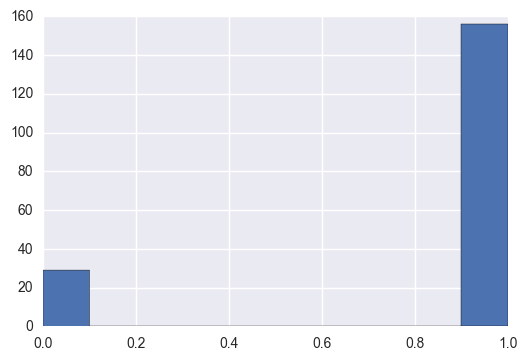


Treated Group for  black


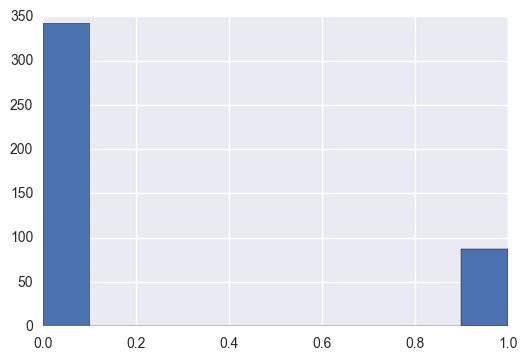

Treated Group 
 count    429.000000
mean       0.202797
std        0.402552
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: black, dtype: float64
Untreated Group 
 count    185.000000
mean       0.843243
std        0.364558
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: black, dtype: float64
Normality ks test for treated group:  KstestResult(statistic=0.62689253161632852, pvalue=0.0)
Normality ks test for untreated group:  KstestResult(statistic=0.61972312444692124, pvalue=0.0)
Result of Kolmogorov-Smirnov between treated and untreated group :  Ks_2sampResult(statistic=0.64044604044604037, pvalue=1.5611088964264006e-47)
 
Untreated Group for  educ


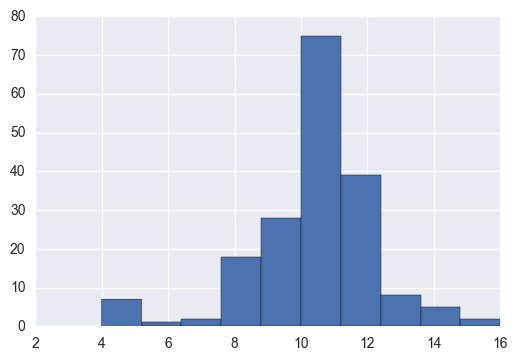


Treated Group for  educ


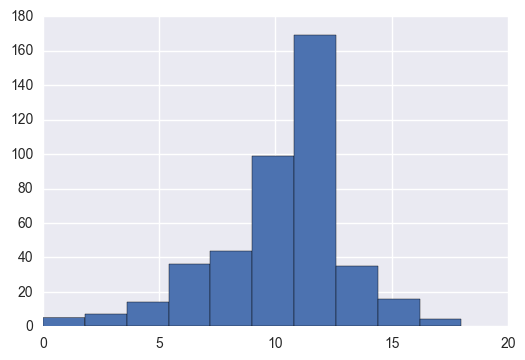

Treated Group 
 count    429.000000
mean      10.235431
std        2.855238
min        0.000000
25%        9.000000
50%       11.000000
75%       12.000000
max       18.000000
Name: educ, dtype: float64
Untreated Group 
 count    185.000000
mean      10.345946
std        2.010650
min        4.000000
25%        9.000000
50%       11.000000
75%       12.000000
max       16.000000
Name: educ, dtype: float64
Normality ks test for treated group:  KstestResult(statistic=0.96500329379313188, pvalue=0.0)
Normality ks test for untreated group:  KstestResult(statistic=0.83243214578086056, pvalue=0.0)
Result of Kolmogorov-Smirnov between treated and untreated group :  Ks_2sampResult(statistic=0.11137151137151136, pvalue=0.075243451787299645)
 
Untreated Group for  hispan


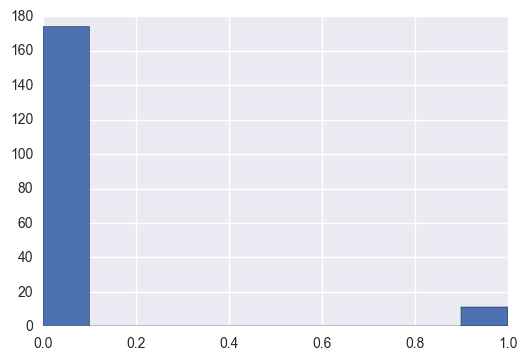


Treated Group for  hispan


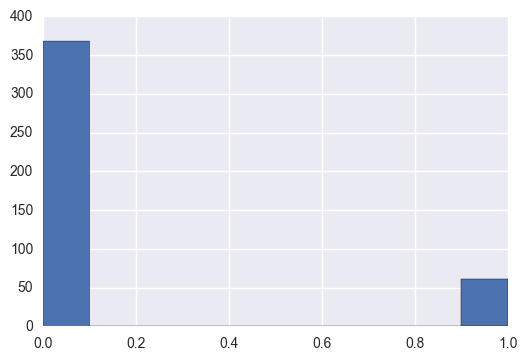

Treated Group 
 count    429.000000
mean       0.142191
std        0.349654
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: hispan, dtype: float64
Untreated Group 
 count    185.000000
mean       0.059459
std        0.237124
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: hispan, dtype: float64
Normality ks test for treated group:  KstestResult(statistic=0.69449159921539605, pvalue=0.0)
Normality ks test for untreated group:  KstestResult(statistic=0.77647988120367806, pvalue=0.0)
Result of Kolmogorov-Smirnov between treated and untreated group :  Ks_2sampResult(statistic=0.082731682731682743, pvalue=0.32586485433207213)
 
Untreated Group for  married


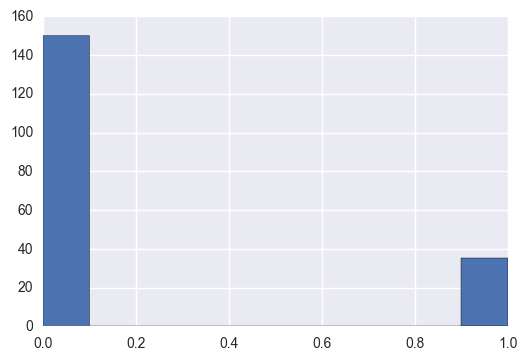


Treated Group for  married


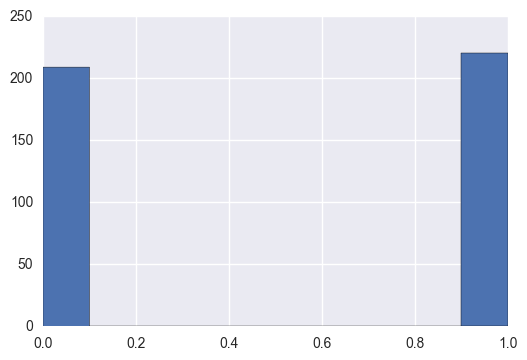

Treated Group 
 count    429.000000
mean       0.512821
std        0.500419
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: married, dtype: float64
Untreated Group 
 count    185.000000
mean       0.189189
std        0.392722
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: married, dtype: float64
Normality ks test for treated group:  KstestResult(statistic=0.49766899766899764, pvalue=0.0)
Normality ks test for untreated group:  KstestResult(statistic=0.64675015147394832, pvalue=0.0)
Result of Kolmogorov-Smirnov between treated and untreated group :  Ks_2sampResult(statistic=0.32363132363132369, pvalue=1.8711176150172213e-12)
 
Untreated Group for  nodegree


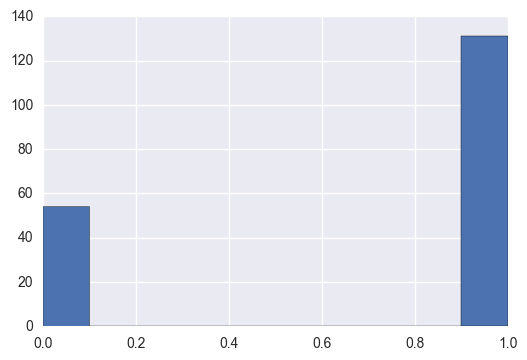


Treated Group for  nodegree


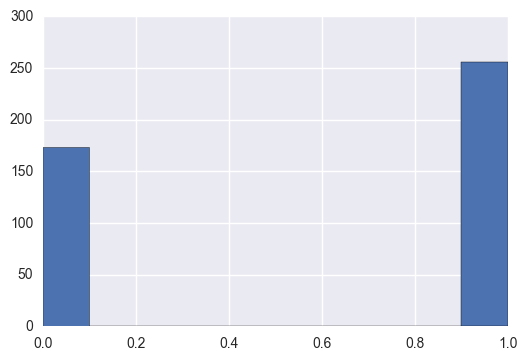

Treated Group 
 count    429.000000
mean       0.596737
std        0.491126
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: nodegree, dtype: float64
Untreated Group 
 count    185.000000
mean       0.708108
std        0.455867
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: nodegree, dtype: float64
Normality ks test for treated group:  KstestResult(statistic=0.5, pvalue=0.0)
Normality ks test for untreated group:  KstestResult(statistic=0.52783123255502939, pvalue=0.0)
Result of Kolmogorov-Smirnov between treated and untreated group :  Ks_2sampResult(statistic=0.11137151137151136, pvalue=0.075243451787299645)
 
Untreated Group for  re74


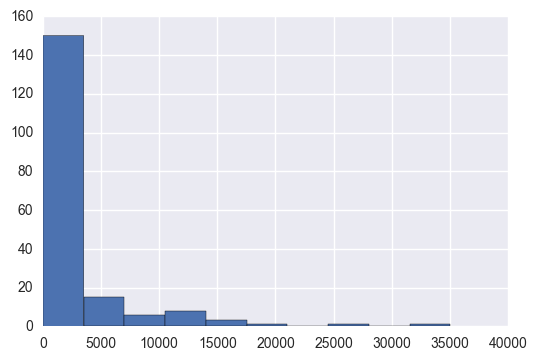


Treated Group for  re74


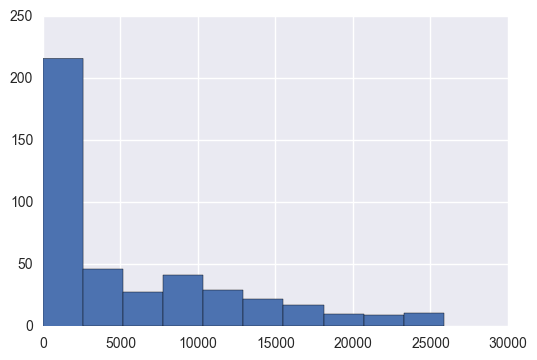

Treated Group 
 count      429.000000
mean      5619.236506
std       6788.750796
min          0.000000
25%          0.000000
50%       2547.047000
75%       9277.128000
max      25862.320000
Name: re74, dtype: float64
Untreated Group 
 count      185.000000
mean      2095.573689
std       4886.620353
min          0.000000
25%          0.000000
50%          0.000000
75%       1291.468000
max      35040.070000
Name: re74, dtype: float64
Normality ks test for treated group:  KstestResult(statistic=0.72727272727272729, pvalue=0.0)
Normality ks test for untreated group:  KstestResult(statistic=0.98378378378378384, pvalue=0.0)
Result of Kolmogorov-Smirnov between treated and untreated group :  Ks_2sampResult(statistic=0.44703584703584703, pvalue=2.2364398676203345e-23)
 
Untreated Group for  re75


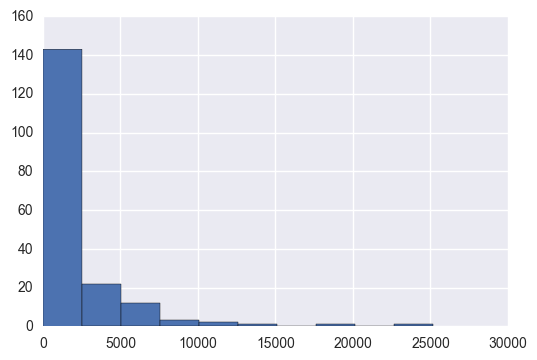


Treated Group for  re75


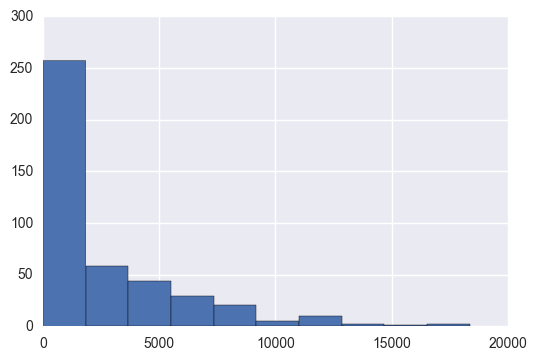

Treated Group 
 count      429.000000
mean      2466.484443
std       3291.996183
min          0.000000
25%          0.000000
50%       1086.726000
75%       3881.419000
max      18347.230000
Name: re75, dtype: float64
Untreated Group 
 count      185.000000
mean      1532.055314
std       3219.250870
min          0.000000
25%          0.000000
50%          0.000000
75%       1817.284000
max      25142.240000
Name: re75, dtype: float64
Normality ks test for treated group:  KstestResult(statistic=0.49883449883449882, pvalue=0.0)
Normality ks test for untreated group:  KstestResult(statistic=0.5, pvalue=0.0)
Result of Kolmogorov-Smirnov between treated and untreated group :  Ks_2sampResult(statistic=0.2876456876456876, pvalue=6.2870756811815524e-10)
 
Untreated Group for  re78


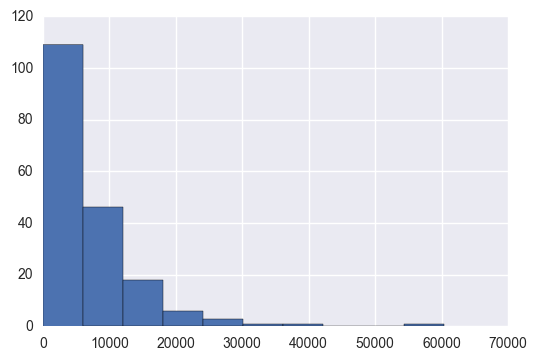


Treated Group for  re78


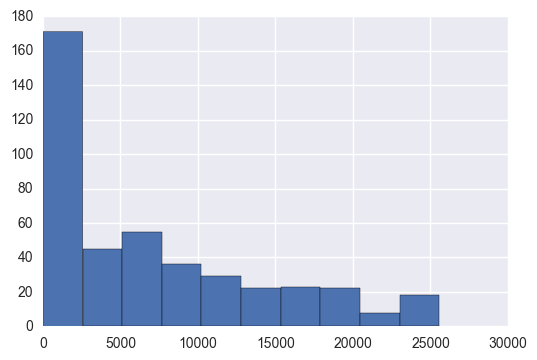

Treated Group 
 count      429.000000
mean      6984.169742
std       7294.161791
min          0.000000
25%        220.181300
50%       4975.505000
75%      11688.820000
max      25564.670000
Name: re78, dtype: float64
Untreated Group 
 count      185.000000
mean      6349.143530
std       7867.402218
min          0.000000
25%        485.229800
50%       4232.309000
75%       9642.999000
max      60307.930000
Name: re78, dtype: float64
Normality ks test for treated group:  KstestResult(statistic=0.95571095571095566, pvalue=0.0)
Normality ks test for untreated group:  KstestResult(statistic=0.98378378378378384, pvalue=0.0)
Result of Kolmogorov-Smirnov between treated and untreated group :  Ks_2sampResult(statistic=0.098607698607698691, pvalue=0.15279452288468109)


In [251]:
featuresOFInterest = dataset[dataset.columns.difference(['id','treat'])]
for feature in featuresOFInterest.columns:
    print(' \nUntreated Group for ', feature)
    plt.hist(untreated[feature],10)
    plt.show()

    print('\nTreated Group for ', feature)
    plt.hist(treated[feature], 10)
    plt.show()

    print('Treated Group \n', treated[feature].describe())
    print('Untreated Group \n',untreated[feature].describe())
    
    print('Normality ks test for treated group: ', stats.kstest(treated[feature], 'norm', args=(treated[feature],)))
    print('Normality ks test for untreated group: ', stats.kstest(untreated[feature], 'norm', args=(untreated[feature],)))
    print('Result of Kolmogorov-Smirnov between treated and untreated group : ' ,stats.ks_2samp(treated[feature],untreated[feature]))

From stats doc:
If the K-S statistic is small or the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same.


Treated Group for  re78


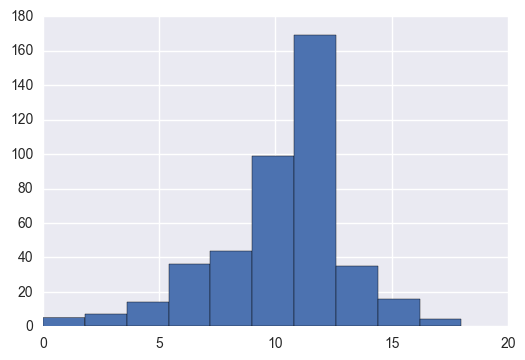

10.235431235431236


In [198]:
print('\nTreated Group for ', feature)
plt.hist(treated['educ'], 10)
plt.show()
stats.kstest(treated['educ'],'norm', args=(10.2,))
print(np.mean(treated['educ']))

# 3. A propsensity score model

Use logistic regression to estimate propensity scores for all points in the dataset. You may use sklearn to fit the logistic regression model and apply it to each data point to obtain propensity scores:

from sklearn import linear_model
logistic = linear_model.LogisticRegression()

Recall that the propensity score of a data point represents its probability of receiving the treatment, based on its pre-treatment features (in this case, age, education, pre-treatment income, etc.). To brush up on propensity scores, you may read chapter 3.3 of the above-cited book by Rosenbaum or this article.

Note: you do not need a train/test split here. Train and apply the model on the entire dataset. If you're wondering why this is the right thing to do in this situation, recall that the propensity score model is not used in order to make predictions about unseen data. Its sole purpose is to balance the dataset across treatment groups. (See p. 74 of Rosenbaum's book for an explanation why slight overfitting is even good for propensity scores. If you want even more information, read this article.)

In [252]:
logistic = LogisticRegression(random_state=1)
selectedFeatures = dataset.drop(['id','treat'], axis=1)
logistic.fit(selectedFeatures,dataset['treat'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [253]:
propensity_scores = logistic.predict_proba(selectedFeatures)
dataset['propensity pred.']=[k[1] for k in logistic.predict_proba(selectedFeatures)]
propensity_scores
treated    = dataset[dataset['treat'] == 0]
untreated  = dataset[dataset['treat'] == 1]
treated

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,propensity pred.
185,PSID1,0,30,12,0,0,1,0,20166.7300,18347.230,25564.6700,0.065644
186,PSID2,0,26,12,0,0,1,0,25862.3200,17806.550,25564.6700,0.046416
187,PSID3,0,25,16,0,0,1,0,25862.3200,15316.210,25564.6700,0.030453
188,PSID4,0,42,11,0,0,1,1,21787.0500,14265.290,15491.0100,0.032271
189,PSID5,0,25,9,1,0,1,1,14829.6900,13776.530,0.0000,0.374373
190,PSID6,0,37,9,1,0,1,1,13685.4800,12756.050,17833.2000,0.439149
191,PSID7,0,32,12,0,0,1,0,19067.5800,12625.350,14146.2800,0.041792
192,PSID8,0,20,12,1,0,0,0,7392.3140,12396.190,17765.2300,0.749558
193,PSID9,0,38,9,0,1,1,1,16826.1800,12029.180,0.0000,0.027595
194,PSID10,0,39,10,0,0,1,1,16767.4100,12022.020,4433.1800,0.036798


The propensity score is the probability of treatment assignment conditional on observed baseline characteristics.

# 4. Balancing the dataset via matching

Use the propensity scores to match each data point from the treated group with exactly one data point from the control group, while ensuring that each data point from the control group is matched with at most one data point from the treated group. (Hint: you may explore the networkx package in Python for predefined matching functions.)

Your matching should maximize the similarity between matched subjects, as captured by their propensity scores. In other words, the sum (over all matched pairs) of absolute propensity-score differences between the two matched subjects should be minimized.

After matching, you have as many treated as you have control subjects. Compare the outcomes (re78) between the two groups (treated and control).

Also, compare again the feature-value distributions between the two groups, as you've done in part 2 above, but now only for the matched subjects. What do you observe? Are you closer to being able to draw valid conclusions now than you were before?

In [254]:
import networkx

In [256]:
len(untreated)

185